The concept regularization is used to stop the model from overfitting .
There are two types of regularization techniques
1-> lasso regularization(L1 regularization),
2->ridge regression(L2 regularization)

They are particularly different in what loss function they minimize


In [17]:
#so here we try to import our random numbers file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
data=pd.read_csv("/content/iris.csv")


In [19]:

#here we take only the 3 parameters , lets take SepalLenght,SepalWidth,PetalLenght
data=data.drop('PetalWidthCm',axis=1)
#now we print the dataset
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


In [22]:
data['Species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2],inplace=True)
#this replaces the non categorical value to numerical value


In [25]:
#we also need to remove the species column
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,0
1,2,4.9,3.0,1.4,0
2,3,4.7,3.2,1.3,0
3,4,4.6,3.1,1.5,0
4,5,5.0,3.6,1.4,0
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2
146,147,6.3,2.5,5.0,2
147,148,6.5,3.0,5.2,2
148,149,6.2,3.4,5.4,2


In [32]:
data=data.drop('Species',axis=1)
data #we have removed the species column also

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


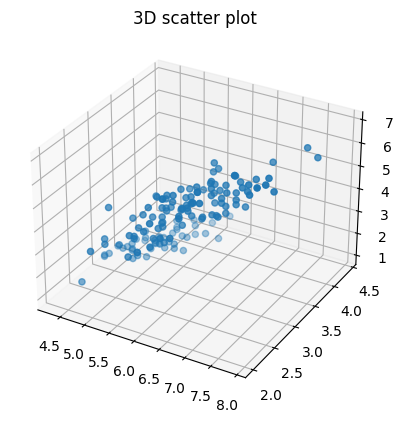

In [34]:
#here we plot the data to see how the data is

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
z = data['PetalLengthCm']
x = data['SepalLengthCm']
y = data['SepalWidthCm']
ax.scatter3D(x, y, z, 'gray')
ax.set_title('3D scatter plot')
plt.show()

Ridge regularization typically minimizes the function
sum_of_squared_residuals+lambda*sum(independent_variables)**2

Whereas Lasso regularization minimizes the function
sum_of_squared_residuals+lambda*mod(sum_of_independent_variables)

In [38]:
#now after getting the data
#since there is a 3 dimensional data , we should have general line equation as
#z=y*m+n*x+d

#so here the independent variables are x and y
#so here we start by intializing the values of m,n and d as 0


def ridge_regularization(x,y,z,m,n,d,lambda1):
  z_predicted=m*x+n*y+d
  error=0.5*(z-z_predicted)**2+lambda1*(m**2+n**2)
  return [z_predicted,error]



def lasso_regularization(x,y,z,m,n,d,lambda1):
  z_predicted=m*x+n*y+d
  error=0.5*(z-z_predicted)**2+lambda1*(math.mod(m)+math.mod(n))
  return [z_predicted,error]

#choice 1 ->lasso regularization
#choice 2->ridge regularization

def update_m(choice,x,y,z,m,n,d,lambda1):
  if(choice==1): #lasso regularization
    s=lasso_regularization(x,y,z,m,n,d,lambda1)
    del_e_by_del_m=(z-s[0])*(-1)*x+lambda1

  else: #ridge regularization
    s=ridge_regularization(x,y,z,m,n,d,lambda1)
    del_e_by_del_m=(z-s[0])*(-1)*x+2*lambda1*m

  return m-0.01*del_e_by_del_m  #here the learning rate is 0.01 and the m is updated


def update_n(choice,x,y,z,m,n,d,lambda1):
  if(choice==1): #lasso regularization
    s=lasso_regularization(x,y,z,m,n,d,lambda1)
    del_e_by_del_n=(z-s[0])*(-1)*y+lambda1

  else: #ridge regularization
    s=ridge_regularization(x,y,z,m,n,d,lambda1)
    del_e_by_del_n=(z-s[0])*(-1)*x+2*lambda1*n

  return n-0.01*del_e_by_del_n  #here the learning rate is 0.01 and the m is updated


def update_d(choice,x,y,z,m,n,d,lambda1):
  if(choice==1): #lasso regularization
    s=lasso_regularization(x,y,z,m,n,d,lambda1)
    del_e_by_del_d=(z-s[0])*(-1)

  else: #ridge regularization
    s=ridge_regularization(x,y,z,m,n,d,lambda1)
    del_e_by_del_d=(z-s[0])*(-1)

  return d-0.01*del_e_by_del_d  #here the learning rate is 0.01 and the m is updated







In [43]:

m=0
n=0
d=0

x_data_train = data['SepalLengthCm'][:139]
x_data_test = data['SepalLengthCm'][:139:]
y_data_train = data['SepalWidthCm'][:139]
y_data_test = data['SepalWidthCm'][139:]
z_data_train = data['PetalLengthCm'][:139]
z_data_test = data['PetalLengthCm'][139:]

#here since the number of sample is less
#we go with the stochastic gradient descent , we update weight as soon as we get the wrong value
choice=int(input("Enter the regularization you want to choose(1 for lasso  and 2 for ridge)  ::  "))
lambda1=float(input("Enter the ridge/lasso constraint  ::  "))
#now we train for 5 number of epochs
epochs=int(input("CHOOSE  THE NUMBER OF EPOCHS ::  "))

error=[]
for i in range(epochs):
  sum_error=0
  for j in range(len(x_data_train)):
    previous_m=m
    previous_n=n    #store the previous values
    previous_d=d
    #now we train our model

    if(choice==1): #for lasso regularization
      print("------------------------------------")
      s=lasso_regularization(x[j],y[j],z[j],m,n,d,lambda1)
      print("PRESENT ERROR IS  ",s[0])
      print("PRESENT ERROR IS  ",s[0])
      print("Previous m value is ",m)
      print("Previous n value is ",n)
      print("Previous d value is ",d)
      m=update_m(choice,x[j],y[j],z[j],m,n,d,lambda1)
      n=update_n(choice,x[j],y[j],z[j],m,n,d,lambda1)
      d=update_d(choice,x[j],y[j],z[j],m,n,d,lambda1)
      print("New m value is ",m)
      print("New n value is ",n)
      print("New d value is ",d)


    else:#for ridge regularization
      print("------------------------------------")
      s=ridge_regularization(x[j],y[j],z[j],m,n,d,lambda1)
      print("PRESENT ERROR IS  ",s[0])
      print("Previous m value is ",m)
      print("Previous n value is ",n)
      print("Previous d value is ",d)
      m=update_m(choice,x[j],y[j],z[j],m,n,d,lambda1)
      n=update_n(choice,x[j],y[j],z[j],m,n,d,lambda1)
      d=update_d(choice,x[j],y[j],z[j],m,n,d,lambda1)
      print("New m value is ",m)
      print("New n value is ",n)
      print("New d value is ",d)

    sum_error+=s[0]

  sum_error=sum_error/len(x_data_train)
  error.append(sum_error)





Enter the regularization you want to choose(1 for lasso  and 2 for ridge)  ::  2
Enter the ridge/lasso constraint  ::  0.01
------------------------------------
PRESENT ERROR IS   0.0
------------------------------------
PRESENT ERROR IS   0.5168561698999999
------------------------------------
PRESENT ERROR IS   0.827394052695736
------------------------------------
PRESENT ERROR IS   0.9661695496889167
------------------------------------
PRESENT ERROR IS   1.268306454385298
------------------------------------
PRESENT ERROR IS   1.4249524139716085
------------------------------------
PRESENT ERROR IS   1.3324025094344705
------------------------------------
PRESENT ERROR IS   1.4295867074700803
------------------------------------
PRESENT ERROR IS   1.2713623457764633
------------------------------------
PRESENT ERROR IS   1.4371199648407327
------------------------------------
PRESENT ERROR IS   1.648429389772538
------------------------------------
PRESENT ERROR IS   1.42587099008

In [44]:
#now we can visualize the error /epochs
iteration_list=[]
for i in range(epochs):
  iteration_list.append(i)



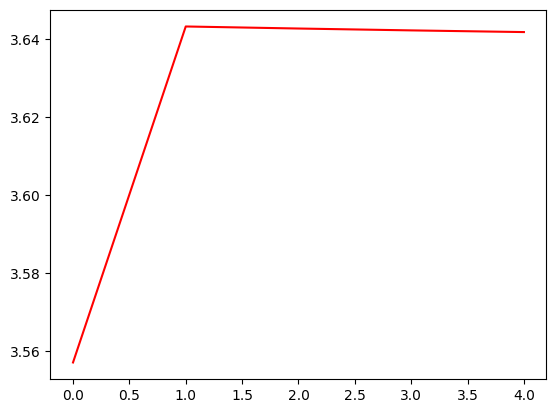

In [45]:
plt.plot(iteration_list,error,color='red')
plt.show()